# CaseStudy - Startup Extension

This dataset has funding information of the Indian startups from January 2015 to August 2017.

Feature Details :

 * SNo - Serial number.
 * Date - Date of funding in format DD/MM/YYYY.
 * StartupName - Name of the startup which got funded.
 * IndustryVertical - Industry to which the startup belongs.
 * SubVertical - Sub-category of the industry type.
 * CityLocation - City which the startup is based out of.
 * InvestorsName - Name of the investors involved in the funding round.
 * InvestmentType - Either Private Equity or Seed Funding.
 * AmountInUSD - Funding Amount in USD.
 * Remarks - Other information, if any.




In [1]:
# Import related libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [66]:
#Load dataset using pd.read_csv since it is a CSV file
start_up = pd.read_csv(r"E:\Function UP\Python\Projects\case study 1&2\startup_funding.csv")

In [3]:
# Make a copy of the Original dataet and use this copied dtaset for case study, so it's not effect the original dataset.
df = start_up.copy()

In [4]:
df.columns.to_list()

['Sr No',
 'Date dd/mm/yyyy',
 'Startup Name',
 'Industry Vertical',
 'SubVertical',
 'City  Location',
 'Investors Name',
 'InvestmentnType',
 'Amount in USD',
 'Remarks']

In [5]:
# Exploring a brife information about the dataset, gather insights from the same.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
df = df.drop_duplicates()

In [7]:
# Checking how many nullvalues are present in every feature of the dataset
print(df.isnull().sum()) # total number of nullvalues of every feature

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64


* Drop 'Remarks' column, since it is not play any mejor role for our case study but it' is contain more than 80% null values.

In [8]:
df = df.drop(['Remarks'],axis=1)

In [9]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043
Sr No,1,2,3,4,5,6,7,8,9,10,...,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044
Date dd/mm/yyyy,09/01/2020,13/01/2020,09/01/2020,02/01/2020,02/01/2020,13/01/2020,10/01/2020,12/12/2019,06/12/2019,03/12/2019,...,24/01/2015,24/01/2015,25/01/2015,27/01/2015,28/01/2015,29/01/2015,29/01/2015,30/01/2015,30/01/2015,31/01/2015
Startup Name,BYJU’S,Shuttl,Mamaearth,https://www.wealthbucket.in/,Fashor,Pando,Zomato,Ecozen,CarDekho,Dhruva Space,...,Aasaanjobs,Impartus,Thrill App,CarDekho.com,Grabhouse.com,Printvenue,Graphene,Mad Street Den,Simplotel,couponmachine.in
Industry Vertical,E-Tech,Transportation,E-commerce,FinTech,Fashion and Apparel,Logistics,Hospitality,Technology,E-Commerce,Aerospace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubVertical,E-learning,App based shuttle service,Retailer of baby and toddler products,Online Investment,Embroiled Clothes For Women,"Open-market, freight management platform",Online Food Delivery Platform,Agritech,Automobile,Satellite Communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City Location,Bengaluru,Gurgaon,Bengaluru,New Delhi,Mumbai,Chennai,Gurgaon,Pune,Gurgaon,Bengaluru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investors Name,Tiger Global Management,Susquehanna Growth Equity,Sequoia Capital India,Vinod Khatumal,Sprout Venture Partners,Chiratae Ventures,Ant Financial,Sathguru Catalyzer Advisors,Ping An Global Voyager Fund,"Mumbai Angels, Ravikanth Reddy",...,"Inventus Capital Partners, IDG Ventures",Kaizen Private Equity,People Group (Shaadi.com),"Hillhouse Capital, Tybourne Capital","Kalaari Capital, Sequoia Capital",Asia Pacific Internet Group,KARSEMVEN Fund,"Exfinity Fund, GrowX Ventures.",MakeMyTrip,UK based Group of Angel Investors
InvestmentnType,Private Equity Round,Series C,Series B,Pre-series A,Seed Round,Series A,Private Equity Round,Series A,Series D,Seed,...,Seed Funding,Private Equity,Private Equity,Private Equity,Private Equity,Private Equity,Private Equity,Private Equity,Private Equity,Seed Funding
Amount in USD,"20,00,00,000","80,48,394","1,83,58,860","30,00,000","18,00,000","90,00,000","15,00,00,000","60,00,000","7,00,00,000","5,00,00,000",...,"15,00,000",NaN,"10,00,000","5,00,00,000","25,00,000","45,00,000","8,25,000","15,00,000",NaN,"1,40,000"


* check for how many unique values are present

In [10]:
print('Startup Name - ',df['Startup Name'].nunique())
print('Industry Vertical - ',df['Industry Vertical'].nunique())
print('SubVertical - ',df['SubVertical'].nunique())
print('City  Location - ',df['City  Location'].nunique())
print('Investors Name - ',df['Investors Name'].nunique())
print('InvestmentnType - ',df['InvestmentnType'].nunique())

Startup Name -  2459
Industry Vertical -  821
SubVertical -  1942
City  Location -  112
Investors Name -  2412
InvestmentnType -  55


In [11]:
#using rename function change column name
rename_columns = {'Date dd/mm/yyyy' : 'Date'}
df.rename(columns=rename_columns,inplace=True)
df

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [12]:
#check for data types for each column
df.dtypes

Sr No                 int64
Date                 object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
dtype: object

At first we convert 'Date' column from 'Object' datatype to datetime64[ns] datatype but facing some issues that some elements are not support the datetime64[ns] format.
So lets Solve this issues one by one.

In [13]:
# df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y') 
#errror :time data '05/072018' does not match format '%d/%m/%Y' (match)()

#solve this issue by replacing correct format in the place of unsupported format.
df['Date'] = df['Date'].str.replace('05/072018','05/07/2018')

In [14]:
#df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')
# error: time data '01/07/015' does not match format '%d/%m/%Y' (match)

#solve this issue by replacing correct format in the place of unsupported format.
df['Date'] = df['Date'].str.replace('01/07/015','01/07/2015')

In [15]:
# df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')
# error:time data '\\xc2\\xa010/7/2015' does not match 
#     format '%d/%m/%Y' (match)

#solve this issue by replacing correct format in the place of unsupported format.
df['Date'] = df['Date'].str.replace('\\\\', '',regex=True)
df['Date'] = df['Date'].str.replace('xc2xa0', '',regex=True)

In [16]:
# df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')
# ValueError: time data '12/05.2015' does not match format '%d/%m/%Y' (match)

df['Date'] = df['Date'].str.replace('12/05.2015','01/07/2015',regex=True)

In [17]:
# df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')
# ValueError: time data '13/04.2015' does not match format '%d/%m/%Y' (match)

df['Date'] = df['Date'].str.replace('13/04.2015','01/07/2015',regex=True)

In [18]:
# df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')
# ValueError: time data '15/01.2015' does not match format '%d/%m/%Y' (match)

df['Date'] = df['Date'].str.replace('15/01.2015','01/07/2015',regex=True)

In [19]:
# df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')
# ValueError: time data '22/01//2015' does not match format '%d/%m/%Y' (match)

df['Date'] = df['Date'].str.replace('22/01//2015', '22/01/2015', regex=True)

In [20]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d/%m/%Y')

In [21]:
# Check datatype of every column for data cleaning and formating
df.dtypes

Sr No                         int64
Date                 datetime64[ns]
Startup Name                 object
Industry Vertical            object
SubVertical                  object
City  Location               object
Investors Name               object
InvestmentnType              object
Amount in USD                object
dtype: object

In [22]:
# Split 'Date dd/mm/yyyy' column into three column named  'Day' , 'Month' ,
# 'Year' and column named "Date dd/mm/yyyy" is changed to "Date" for
# simplicity purpose. Print DataFrame for view the result
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

*  'Amount in USD' column is not in correct datatype. It's present as a 'Object'. So I convert this into 'Float' datatype. but here we face some issues for wrong formatng,some of the positions have values which cannot be converted to numerical data, so I replace these incorrect things.


In [23]:
df['Amount in USD'] = df['Amount in USD'].str.replace('\\\\', '',regex=True)
df['Amount in USD'] = df['Amount in USD'].str.replace('xc2xa0', '',regex=True)
df['Amount in USD'] = df['Amount in USD'].str.replace('N/A', '0')
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')
df['Amount in USD'] = df['Amount in USD'].str.replace('unknown', '0')
df['Amount in USD'] = df['Amount in USD'].str.replace('undisclosed', '0')
df['Amount in USD'] = df['Amount in USD'].str.replace('Undisclosed', '0')
df['Amount in USD'] = df['Amount in USD'].str.rstrip('+')

After solving these issues I converted  'Amount in USD' column into 'float datatype and fill nullvalues with '0'.Which is not creat probelm for any
numerical operation on these column and didn't affect calculation and do checking for nullvalue and datatype

In [24]:
df['Amount in USD'] = df['Amount in USD'].astype(float).fillna(0)
print("For 'Amount in USD' Number of nullvalues - ",df['Amount in USD'].isnull().sum())
print("For 'Amount in USD'Datatype is - ",df['Amount in USD'].dtypes)

For 'Amount in USD' Number of nullvalues -  0
For 'Amount in USD'Datatype is -  float64


In [25]:
#Analyse the datapoints in Industry Vertical column
df['Industry Vertical'].unique().tolist()

['E-Tech',
 'Transportation',
 'E-commerce',
 'FinTech',
 'Fashion and Apparel',
 'Logistics',
 'Hospitality',
 'Technology',
 'E-Commerce',
 'Aerospace',
 'B2B-focused foodtech startup',
 'Finance',
 'Video',
 'Gaming',
 'Software',
 'Health and wellness',
 'Education',
 'Food and Beverage',
 'Health and Wellness',
 'B2B Marketing',
 'Video Games',
 'SaaS',
 'Last Mile Transportation',
 'Healthcare',
 'Customer Service',
 'B2B',
 'Consumer Goods',
 'Advertising, Marketing',
 'IoT',
 'Information Technology',
 'Consumer Technology',
 'Accounting',
 'Retail',
 'Customer Service Platform',
 'Automotive',
 'EdTech',
 'Services',
 'Compliance',
 'Transport',
 'Artificial Intelligence',
 'Tech',
 'Health Care',
 'Luxury Label',
 'Waste Management Service',
 'Deep-Tech',
 'Agriculture',
 'Energy',
 'Digital Media',
 'Saas',
 'Automobile',
 'Agtech',
 'Social Media',
 'Fintech',
 'Edtech',
 'AI',
 'Ecommerce',
 'Nanotechnology',
 'Services Platform',
 'Travel Tech',
 'Online Education',
 'Onl

* In 'Industry Vertical' column some of the positions have values which is not proper or have meaning,so I replace these incorrect things.


In [26]:
df['Industry Vertical'] = df['Industry Vertical'].str.replace('\\\\', '',regex=True)
df['Industry Vertical'] = df['Industry Vertical'].str.replace('xc2xa0', '',regex=True)

In [27]:
#Analyse the datapoints in SubVertical column
df['SubVertical'].unique().tolist()

['E-learning',
 'App based shuttle service',
 'Retailer of baby and toddler products',
 'Online Investment',
 'Embroiled Clothes For Women',
 'Open-market, freight management platform',
 'Online Food Delivery Platform',
 'Agritech',
 'Automobile',
 'Satellite Communication',
 'Logistics Services and Solutions',
 'Food Solutions For Corporate',
 'Online Meat And Seafood Ordering Startup',
 'Non-Banking Financial Company',
 'Experience Discovery Platform',
 'Real money based gaming startup',
 'Online Eyewear Shopping Portal',
 'Business and customer engagement tools',
 "Men's Health and Wellness brand",
 'Elearning',
 'Indian Burger Brand',
 'Healthcare services',
 'Financial Services To MSMEs',
 'Social gaming platform',
 'Recovery software',
 'Electric bike rental',
 'Virtual e-commerce platform',
 'B2B platform for medical supplies',
 'Scooter sharing app',
 'Music Education',
 'Mobile Wallet',
 'Delivery Service',
 'Business development',
 'Beauty and Grooming',
 'Financial Services'

In 'SubVertical' column some of the positions have values which is not proper or have meaning,so I replace these incorrect things.


In [28]:
df['SubVertical'] = df['SubVertical'].str.replace('\\\\', '',regex=True)
df['SubVertical'] = df['SubVertical'].str.replace('xc2xa0', '',regex=True)

In [29]:
#Analyse the datapoints in 'City  Location' column
df['City  Location'].unique().tolist()

['Bengaluru',
 'Gurgaon',
 'New Delhi',
 'Mumbai',
 'Chennai',
 'Pune',
 'Noida',
 'Faridabad',
 'San Francisco',
 'San Jose,',
 'Amritsar',
 'Delhi',
 'Kormangala',
 'Tulangan',
 'Hyderabad',
 'Burnsville',
 'Menlo Park',
 'Gurugram',
 'Palo Alto',
 'Santa Monica',
 'Singapore',
 'Taramani',
 'Andheri',
 'Chembur',
 'Nairobi',
 'Haryana',
 'New York',
 'Karnataka',
 'Mumbai/Bengaluru',
 'Bhopal',
 'Bengaluru and Gurugram',
 'India/Singapore',
 'Jaipur',
 'India/US',
 'Nagpur',
 'Indore',
 'New York, Bengaluru',
 'California',
 'India',
 'Ahemadabad',
 'Rourkela',
 'Srinagar',
 'Bhubneswar',
 'Chandigarh',
 'Delhi & Cambridge',
 'Kolkatta',
 'Kolkata',
 'Coimbatore',
 'Bangalore',
 'Udaipur',
 nan,
 'Ahemdabad',
 'Bhubaneswar',
 'Ahmedabad',
 'Surat',
 'Goa',
 'Uttar Pradesh',
 'Nw Delhi',
 'Gaya',
 'Vadodara',
 'Trivandrum',
 'Missourie',
 'Panaji',
 'Gwalior',
 'Karur',
 'Udupi',
 'Kochi',
 'Agra',
 'Bangalore/ Bangkok',
 'Hubli',
 'Kerala',
 'Kozhikode',
 'US',
 'Siliguri',
 'USA',


* In 'City  Location' column some of the positions have values which is not proper or have meaning,so I replace these incorrect things.


In [30]:
df['City  Location'] = df['City  Location'].str.replace('\\\\', '',regex=True)
df['City  Location'] = df['City  Location'].str.replace('xc2xa0', '',regex=True)

In [31]:
#Analyse the datapoints in 'Investors Name' column
df['Investors Name'].unique().tolist()

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 nan,
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'IAN Fund an

* In 'Investors Name' column some of the positions have values which is not proper or have meaning,so I replace these incorrect things.


In [32]:
df['Investors Name'] = df['Investors Name'].str.replace('\\\\', '',regex=True)
df['Investors Name'] = df['Investors Name'].str.replace('xc2xa0', '',regex=True)

In [33]:
#Analyse the datapoints in 'InvestmentnType' column
df['InvestmentnType'].unique().tolist()

['Private Equity Round',
 'Series C',
 'Series B',
 'Pre-series A',
 'Seed Round',
 'Series A',
 'Series D',
 'Seed',
 'Series F',
 'Series E',
 'Debt Funding',
 'Series G',
 'Series H',
 'Venture',
 'Seed Funding',
 nan,
 'Funding Round',
 'Corporate Round',
 'Maiden Round',
 'pre-series A',
 'Seed Funding Round',
 'Single Venture',
 'Venture Round',
 'Pre-Series A',
 'Angel',
 'Series J',
 'Angel Round',
 'pre-Series A',
 'Venture - Series Unknown',
 'Bridge Round',
 'Private Equity',
 'Debt and Preference capital',
 'Inhouse Funding',
 'Seed/ Angel Funding',
 'Debt',
 'Pre Series A',
 'Equity',
 'Debt-Funding',
 'Mezzanine',
 'Series B (Extension)',
 'Equity Based Funding',
 'Private Funding',
 'Seed / Angel Funding',
 'Seed/Angel Funding',
 'Seed funding',
 'Seed / Angle Funding',
 'Angel / Seed Funding',
 'Private',
 'Structured Debt',
 'Term Loan',
 'PrivateEquity',
 'Angel Funding',
 'Seed\\\\nFunding',
 'Private\\\\nEquity',
 'Crowd funding',
 'Crowd Funding']

* In 'InvestmentnType' column some of the positions have values which is not proper or have meaning,so I replace these incorrect things.


In [34]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('\\\\', '',regex=True)
df['InvestmentnType'] = df['InvestmentnType'].str.replace('xc2xa0', '',regex=True)

* Fill 'Unknown' keyword for 'SubVertical' columns and drop some row of some columns which contain nullvalues .It will not have any major impact on our casestudy but presence of null values creat problem for study

In [35]:
#Fill 'Unknown' keyword for 'SubVertical' columns
df['SubVertical'] = df['SubVertical'].fillna('Unknown')

In [36]:
type(df)

pandas.core.frame.DataFrame

In [37]:
df.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,9,1,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,13,1,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,9,1,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2,1,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2,1,2020


In [38]:
# drop some row of 'City  Location' columns which contain nullvalues
df = df.dropna(subset=['City  Location'] ,axis=0)

In [39]:
# drop some row of 'InvestmentnType'' columns which contain nullvalues
df = df.dropna(subset='InvestmentnType' ,axis=0)

In [40]:
# drop some row of 'Investors Name' columns which contain nullvalues
df = df.dropna(subset='Investors Name' ,axis=0)

In [41]:
# checking for null value and datatypes of all columns
df.isnull().sum()

Sr No                0
Date                 0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
Day                  0
Month                0
Year                 0
dtype: int64

In [42]:
# final checking for null value and datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2836 entries, 0 to 2872
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              2836 non-null   int64         
 1   Date               2836 non-null   datetime64[ns]
 2   Startup Name       2836 non-null   object        
 3   Industry Vertical  2836 non-null   object        
 4   SubVertical        2836 non-null   object        
 5   City  Location     2836 non-null   object        
 6   Investors Name     2836 non-null   object        
 7   InvestmentnType    2836 non-null   object        
 8   Amount in USD      2836 non-null   float64       
 9   Day                2836 non-null   int32         
 10  Month              2836 non-null   int32         
 11  Year               2836 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(6)
memory usage: 254.8+ KB


In [43]:
# View some sample data
df.sample(10).T

,1795,90,278,653,1137,910,63,51,26,223
Sr No,1796,91,279,654,1138,911,64,52,27,224
Date,2016-04-20 00:00:00,2019-05-06 00:00:00,2018-05-30 00:00:00,2017-08-11 00:00:00,2016-12-09 00:00:00,2017-04-25 00:00:00,2019-07-01 00:00:00,2019-08-13 00:00:00,2019-11-11 00:00:00,2018-07-31 00:00:00
Startup Name,Broomberg,Saahas Zero Waste,Stellaps,Ola Cabs,Wittyparot,UrbanClap,WizCounsel,Uniphore,eBikeGo,Five Star Group
Industry Vertical,Consumer Internet,Waste Management Service,Technology,Consumer Internet,Technology,Consumer Internet,Compliance,Customer Service Platform,Last Mile Transportation,Fin-Tech
SubVertical,Cleaning Services Provider,Optimization,Iot Application Platform In Agriculture,App based cab aggregation Service,Content Management & Productivity platform,Mobile Services Marketplace,Consulting,Conversational AI,Electric bike rental,Non-Bank Lending Platform For SME
City Location,New Delhi,Bengaluru,Bengaluru,Gurgaon,Bangalore,Gurgaon,New Delhi,Palo Alto,Amritsar,Chennai
Investors Name,Undisclosed Angel investors & HNIs,C4D Partners,"IndusAge Partners, Bill & Melinda Gates Founda...",Tekne Capital Management,Mumbai Angels,Trifecta Capital,Kapil Dev,March Capital Partners,Startup Buddy,"TPG, Norwest Venture Partners, Sequoia Capital..."
InvestmentnType,Seed Funding,Venture - Series Unknown,Private Equity,Private Equity,Seed Funding,Private Equity,Angel,Series C,Seed,Private Equity
Amount in USD,0.0,868600.0,14000000.0,36000000.0,450000.0,3100000.0,145000.0,51000000.0,300000.0,100000000.0
Day,20,6,30,11,9,25,1,13,11,31


In [44]:
#Cleaning the data by using lambda function(spelling correction)
df['InvestmentnType'] =df['InvestmentnType'].apply(lambda x : "Private Equity" if 'Privet' in x
                                                                  else  "Seed Funding" if 'Seed' in x
                                                                  else  "Debt Funding" if 'Debt' in x
                                                                  else  "Private Equity" if 'Equity' in x
                                                                  else "Crowd Funding")
df['InvestmentnType'].unique()


array(['Private Equity', 'Crowd Funding', 'Seed Funding', 'Debt Funding'],
      dtype=object)

In [45]:
#correcting some of the startups name
df['Startup Name'] = df['Startup Name'].replace('"BYJU\\\\\'S"','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('BYJU\\\\xe2\\\\x80\\\\x99s','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('Byju\\\\xe2\\\\x80\\\\x99s','BYJU’S')
df['Startup Name'] = df['Startup Name'].replace('Flipkart.com','Flipkart')
df['Startup Name'] = df['Startup Name'].replace('OYO Rooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyo','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyo Rooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('OyoRooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Oyorooms','OYO')
df['Startup Name'] = df['Startup Name'].replace('Ola Cabs','Ola')
df['Startup Name'] = df['Startup Name'].replace('Ola Electric','Ola')
df['Startup Name'] = df['Startup Name'].replace('Olacabs','Ola')

In [46]:
# correcting the word spelling 'Ecommerce'
df['Industry Vertical'] = df['Industry Vertical'].apply(lambda x : "Ecommerce" if 'mmerce' in x else x)
df['Industry Vertical'].unique()

array(['E-Tech', 'Transportation', 'Ecommerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'Aerospace', 'B2B-focused foodtech startup', 'Video', 'Gaming',
       'Software', 'Health and wellness', 'Education',
       'Food and Beverage', 'Health and Wellness', 'B2B Marketing',
       'Video Games', 'SaaS', 'Last Mile Transportation', 'Healthcare',
       'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Finance',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Energy', 'Digital Media', 'Saas', 'Automobile',
       'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Nanotechnology', 'Services Platform', 'Travel Tech',
       'Online Education', 'Onlin

# Qustions

***************
*******
**1. Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend decide the location. NCR includes Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups have received funding maximum number of times. Plot the bar graph between location and number of funding. Take the city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take the city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.**

In [47]:
#For few startups multiple locations are given, one Indian and one Foreign.
#therefore taking  those startups in Indian startup also.
#In most of the cases Indian city names are at first position, so taking only first position

df['City  Location'] = df['City  Location'].apply(
    lambda x : x.split('/')[0] if '/' in x else x)

In [48]:
#Cleaning the data in "City  Location" column
#correcting the values which are indicating the same cities but have variation in spellings and are case sensitive
#and also correcting the values which are not in proper string format.

df['City  Location'] = df['City  Location'].replace('Delhi', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('Bengaluru', 'Bangalore')
df['City  Location'] = df['City  Location'].replace('Gurugram', 'Gurgaon')
df['City  Location'] = df['City  Location'].replace('New York, Bengaluru', 'Bangalore')
df['City  Location'] = df['City  Location'].replace('Delhi & Cambridge', 'New Delhi')
df['City  Location'] = df['City  Location'].replace('Kolkatta', 'Kolkata')
df['City  Location'] = df['City  Location'].replace('Ahemadabad', 'Ahmedabad')
df['City  Location'] = df['City  Location'].replace('Ahemdabad', 'Ahmedabad')
df['City  Location'] = df['City  Location'].replace('Bhubaneswar', 'Bhubneswar')
df['City  Location'] = df['City  Location'].replace('Nw Delhi', 'New Delhi')

In [49]:
# Find top 5 city with respect to recieve top amount of funding and have higest number of startup count.

#create dataframe from the specified 'City Location'
selected_city = df[df['City  Location'].isin(['Bangalore', 'Mumbai','Gurgaon', 'Noida', 'New Delhi'])]

#use groupby to get the result with 'City  Location', 'Amount in USD', 'Startup Name'
top5 = selected_city.groupby('City  Location').agg({'Amount in USD' : 'sum' , 'Startup Name' : 'count',}).reset_index().sort_values(by = 'Amount in USD',ascending=False)

#rename some of the columns
top5 = top5.rename(columns = {'Startup Name' : 'Count'})

#add one more columns
top5['Percentage(%)'] = ((top5['Amount in USD']/df['Amount in USD'].sum())*100).round(2)

#display result

top5

,City Location,Amount in USD,Count,Percentage(%)
0,Bangalore,1.849521e+10,839,51.32
2,Mumbai,4.334740e+09,559,12.03
1,Gurgaon,3.872024e+09,339,10.74
3,New Delhi,3.299875e+09,457,9.16
4,Noida,1.282864e+09,93,3.56


In [50]:
# Top city in desire aspect like receving startup count and amount of funding the maximum time.
selected_city['City  Location'].value_counts().idxmax()

'Bangalore'

In [51]:
# making a frequency table with respect to city location and investment type for better insight.
city_invtype = pd.crosstab(selected_city['City  Location'],selected_city['InvestmentnType'])
city_invtype

InvestmentnType,Crowd Funding,Debt Funding,Private Equity,Seed Funding
City Location,,,,
Bangalore,28,4,409,398
Gurgaon,19,7,161,152
Mumbai,11,6,281,261
New Delhi,13,2,170,272
Noida,2,0,41,50


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


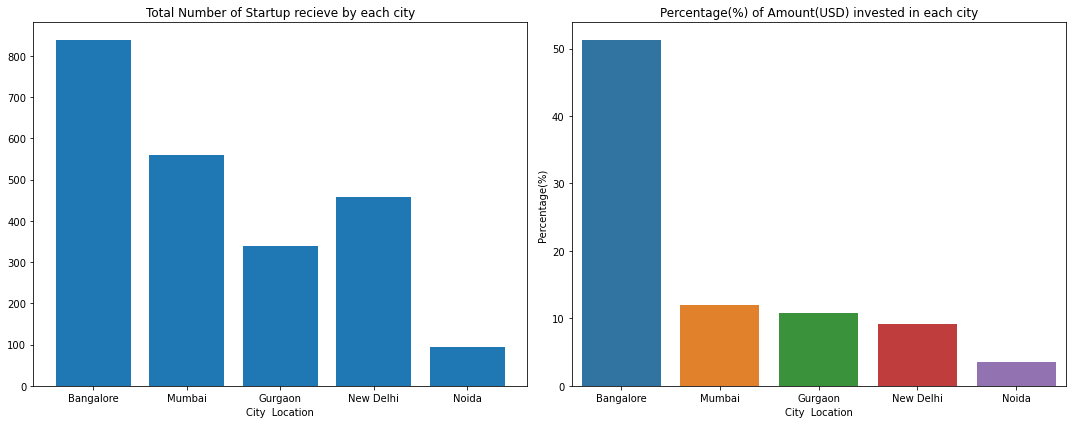

In [52]:
# creat a plot with two subplot 
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.bar(top5['City  Location'] , top5['Count'])
plt.title('Total Number of Startup recieve by each city')
plt.xlabel('City  Location')

plt.subplot(1,2,2)
sns.barplot(top5['City  Location'], top5['Percentage(%)'])
plt.title('Percentage(%) of Amount(USD) invested in each city')
plt.xlabel('City  Location')

plt.tight_layout()
plt.show()

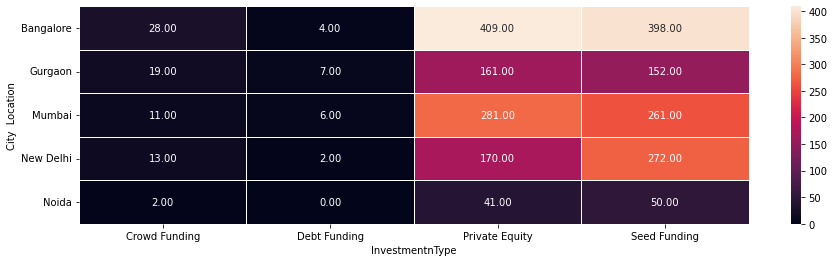

In [53]:
# creat a heatmap for better analyse.
plt.figure(figsize=(15,4))
sns.heatmap(city_invtype ,fmt = '0.2f' , annot = True , linewidth = 0.6)
plt.show()

**Justification :**

From the above analysis and vizualiazation we can see that 'Bangalore' city has higest number of startup and also get highest number of amount recieve for investment. Also we can see that 50.18% of total amount invested in 'Bangalore'. Another things is, in 'Private Equity' and 'Seed Funding' type Invesment is highest in 'Bangalore'. So I suggest my friend that 'Bangalore' city is the best choice for starting and establish the product startup.

********
************

**2. Even after trying so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.**

In [54]:
df['Investors Name'].tolist()

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'Vijay Shekhar Sha

In [55]:
# drop all undisclosed investors rows and make a new DataFrame for analysis
investor_df = df[~(df['Investors Name'].str.contains('^[un,Un].+closed'))]
investor_df

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,9,1,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Crowd Funding,8048394.0,13,1,2020
2,3,2020-01-09,Mamaearth,Ecommerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Crowd Funding,18358860.0,9,1,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Crowd Funding,3000000.0,2,1,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,2,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2869,2015-04-29,Tracxn,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,3500000.0,29,4,2015
2869,2870,2015-04-29,Dazo,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.0,29,4,2015
2870,2871,2015-04-29,Tradelab,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,400000.0,29,4,2015
2871,2872,2015-04-29,PiQube,Hiring Analytics platform,Unknown,Chennai,The HR Fund,Seed Funding,500000.0,29,4,2015


In [56]:
# feach a new dataframe on the base of top 5 investors.

#find top 5
top5_investor = investor_df['Investors Name'].value_counts().nlargest().index.tolist()
print('Name of top 5 investor :',  top5_investor)

#create a dataframe that have 'Investor Name' in top5_investor
top5_investor_df = investor_df[investor_df['Investors Name'].isin(top5_investor)]
top5_investor_df

Name of top 5 investor : ['Indian Angel Network', 'Ratan Tata', 'Kalaari Capital', 'Sequoia Capital', 'Accel Partners']


,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
322,323,2018-03-05,Finova Capital,Consumer Internet,Online Lending,Jaipur,Sequoia Capital,Private Equity,6000000.0,5,3,2018
347,348,2018-03-27,The Print,Media,News portal,New Delhi,Ratan Tata,Seed Funding,535000.0,27,3,2018
423,424,2018-01-30,BrowserStack,Technology,Browser Testing,Mumbai,Accel Partners,Private Equity,50000000.0,30,1,2018
446,447,2017-12-12,Simility,Technology,Adaptive Fraud Intelligence Platform,Hyderabad,Accel Partners,Private Equity,17500000.0,12,12,2017
492,493,2017-11-13,Universal Sportsbiz Pvt. Ltd,Ecommerce,Celebrity fashion accessories and merchandise,Mumbai,Accel Partners,Private Equity,15000000.0,13,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
2705,2706,2015-06-15,Homelane,Home Furnishing Solutions,Unknown,Bangalore,Sequoia Capital,Private Equity,50000000.0,15,6,2015
2729,2730,2015-06-23,Goodservice,Mobile Chat based concierge service,Unknown,New Delhi,Sequoia Capital,Private Equity,1600000.0,23,6,2015
2786,2787,2015-05-19,Akosha,Business Messaging App,Unknown,New Delhi,Sequoia Capital,Private Equity,16000000.0,19,5,2015
2807,2808,2015-05-28,Zoomcar,Self-driven Car rental,Unknown,Bangalore,Sequoia Capital,Private Equity,5000000.0,28,5,2015


In [57]:
print('Name of top 5 investor :')
top5_investor

Name of top 5 investor :


['Indian Angel Network',
 'Ratan Tata',
 'Kalaari Capital',
 'Sequoia Capital',
 'Accel Partners']

In [58]:
# name of top 5 city locations by receving startup count and amount of funding.

print('Top 5 City  Location')
selected_city['City  Location'].value_counts().index.tolist()

Top 5 City  Location


['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida']

In [59]:
# Top city in desire aspect like receving startup count and amount of funding the maximum time.
selected_city['City  Location'].value_counts().idxmax()

'Bangalore'

In [60]:
# create new a dataframe with top investor who are inveted in Bangalore
bang_inv = top5_investor_df[top5_investor_df['City  Location'] == 'Bangalore']

invested_in_Bangalore = bang_inv[['Investors Name','City  Location']]

invested_in_Bangalore

,Investors Name,City Location
1322,Sequoia Capital,Bangalore
1336,Kalaari Capital,Bangalore
1378,Accel Partners,Bangalore
1455,Indian Angel Network,Bangalore
1471,Kalaari Capital,Bangalore
1561,Indian Angel Network,Bangalore
1613,Sequoia Capital,Bangalore
1639,Kalaari Capital,Bangalore
1717,Ratan Tata,Bangalore
1952,Ratan Tata,Bangalore


In [62]:
# creat a dataframe of top 5 investors with how many investment they do and it's percentage

invested_in_Bangalore = invested_in_Bangalore['Investors Name'].value_counts().reset_index()

#name the columns
invested_in_Bangalore.columns = ['Investors_Name','Count_of_Investment']

#find the percentage
invested_in_Bangalore['Percentage(%)'] = ((invested_in_Bangalore['Count_of_Investment']/df['Startup Name'].count())*100).round(2)
invested_in_Bangalore

,Investors_Name,Count_of_Investment,Percentage(%)
0,Kalaari Capital,6,0.21
1,Sequoia Capital,5,0.18
2,Ratan Tata,5,0.18
3,Accel Partners,3,0.11
4,Indian Angel Network,3,0.11


C:\Users\hp\AppData\Local\Temp/ipykernel_12680/647599738.py:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(invested_in_Bangalore['Percentage(%)'], labels=invested_in_Bangalore['Investors_Name'],autopct = '%0.2f%%')


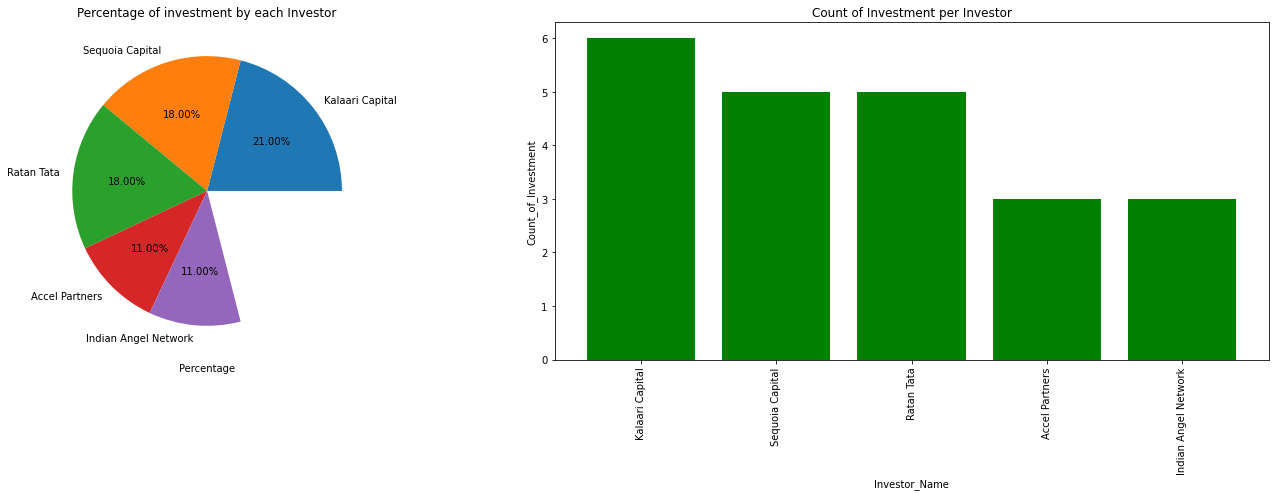

In [65]:
# Plot a graph with two subplot, one is pie chart and other is bar graph
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.pie(invested_in_Bangalore['Percentage(%)'], labels=invested_in_Bangalore['Investors_Name'],autopct = '%0.2f%%')
plt.title('Percentage of investment by each Investor')
plt.xlabel('Percentage')

plt.subplot(1,2,2)
plt.bar(invested_in_Bangalore['Investors_Name'], invested_in_Bangalore['Count_of_Investment'], color='Green')
plt.title('Count of Investment per Investor')
plt.xlabel('Investor_Name')
plt.ylabel('Count_of_Investment')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Justification:**

We can see that from above, top 5 investors named - **'Indian Angel Network' ,  'Ratan Tata' , 'Kalaari Capital' , 'Sequoia Capital' , 'Accel Partners'**  are invested multiple time in 'Bangalore'. So if my friend contact with these investors and can convince them for investment in his startup then it will be the good decision

*********
**************
**3. After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalizing the previous list, you want to improvise it by finding the top 5 investors who have invested in a different number of startups. This list will be more helpful than your previous list in finding the investment for your friend's startup. Find the top 5 investors who have invested a maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

In [68]:
# create a dataframe where unique pair of Investors Name and Startup Name
#are present. Here investors have invested in different companies.
new_investor_df = investor_df[['Investors Name','Startup Name']].drop_duplicates()
new_investor_df

,Investors Name,Startup Name
0,Tiger Global Management,BYJU’S
1,Susquehanna Growth Equity,Shuttl
2,Sequoia Capital India,Mamaearth
3,Vinod Khatumal,https://www.wealthbucket.in/
4,Sprout Venture Partners,Fashor
...,...,...
2868,SAIF Partners,Tracxn
2869,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Dazo
2870,Rainmatter,Tradelab
2871,The HR Fund,PiQube


In [71]:
# Dataframe of top 5 Investors  who have invested a maximum number of times in different companies.
unique_investment_df = new_investor_df.groupby('Investors Name')['Startup Name'].nunique().sort_values(ascending=False).head().reset_index(name = 'Unique_Investment_count')
unique_investment_df

,Investors Name,Unique_Investment_count
0,Indian Angel Network,24
1,Ratan Tata,23
2,Kalaari Capital,15
3,Sequoia Capital,13
4,Accel Partners,12


In [72]:
unique_investment_df['Investors Name'].tolist()

['Indian Angel Network',
 'Ratan Tata',
 'Kalaari Capital',
 'Sequoia Capital',
 'Accel Partners']

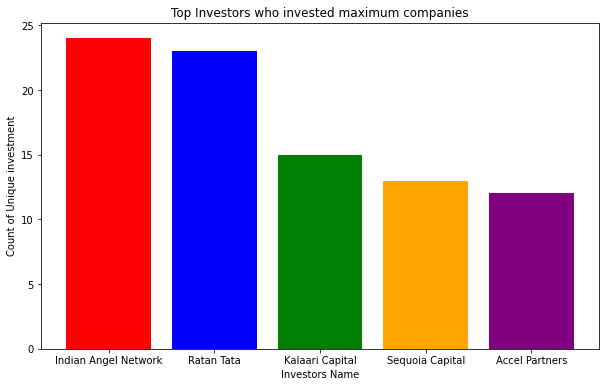

In [74]:
# ploting a bar graph
plt.figure(figsize = (10,6))
plt.bar(unique_investment_df['Investors Name'] , unique_investment_df['Unique_Investment_count'],color = ['Red','Blue','Green','Orange','Purple'])
plt.title('Top Investors who invested maximum companies')
plt.xlabel('Investors Name')
plt.ylabel('Count of Unique investment')
plt.show()

**Justification :**

Here we got top 5 investors who have invested a maximum number of times in different companies. One investor has invested multiple times in one startup. So if my friend convince them to invest in his startup,then it will be more helpful for my friend's success.
 'Indian Angel Network' , 'Ratan Tata' , 'Kalaari Capital' , 'Sequoia Capital' , 'Accel Partners' are list of investors after our findings ' So this list of Investors will be helpfull for  increase the chance to get investment.  

In [75]:
df.head(2).T

,0,1
Sr No,1,2
Date,2020-01-09 00:00:00,2020-01-13 00:00:00
Startup Name,BYJU’S,Shuttl
Industry Vertical,E-Tech,Transportation
SubVertical,E-learning,App based shuttle service
City Location,Bangalore,Gurgaon
Investors Name,Tiger Global Management,Susquehanna Growth Equity
InvestmentnType,Private Equity,Crowd Funding
Amount in USD,200000000.0,8048394.0
Day,9,13


**************
*********************

 **4. Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend's startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistakes. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

In [76]:
df['InvestmentnType'].unique()

array(['Private Equity', 'Crowd Funding', 'Seed Funding', 'Debt Funding'],
      dtype=object)

In [78]:
# create a DataFrame where investors have invested in a different number 
#of startups and their investment type is Crowdfunding or Seed Funding
unique_df = investor_df[~(investor_df[['Investors Name','Startup Name','InvestmentnType']].duplicated(subset = ['Investors Name','Startup Name']))]

#filtering out "Seed Funding","Crowd Funding"
unique_df_type = unique_df[unique_df['InvestmentnType'].isin(["Seed Funding","Crowd Funding"])]
unique_df_type

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Crowd Funding,8048394.0,13,1,2020
2,3,2020-01-09,Mamaearth,Ecommerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Crowd Funding,18358860.0,9,1,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Crowd Funding,3000000.0,2,1,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,1800000.0,2,1,2020
5,6,2020-01-13,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Crowd Funding,9000000.0,13,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
2864,2865,2015-04-28,Jay Robotix,Robotic Program learning,Unknown,Hyderabad,Cross Border Angels & others,Seed Funding,250000.0,28,4,2015
2866,2867,2015-04-29,ReGlobe,Used Gadgets Buy / Refurbishing,Unknown,Gurgaon,"Bessemer Ventures, Blume Ventures",Seed Funding,1000000.0,29,4,2015
2869,2870,2015-04-29,Dazo,Mobile Food Ordering app,Unknown,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0.0,29,4,2015
2870,2871,2015-04-29,Tradelab,Financial Markets Software,Unknown,Bangalore,Rainmatter,Seed Funding,400000.0,29,4,2015


In [79]:
# Creat a DataFrame where top5 investors who have invested in a different 
#number of startups and their investment type is Crowdfunding or Seed Funding
seed_crowd_funding = unique_df_type.groupby(['Investors Name','InvestmentnType'])['Startup Name'].nunique().reset_index().sort_values(by = 'Startup Name',ascending=False).head()
seed_crowd_funding

,Investors Name,InvestmentnType,Startup Name
451,Indian Angel Network,Seed Funding,23
1139,Venture Catalysts,Seed Funding,9
873,Ratan Tata,Seed Funding,7
1208,YouWeCan Ventures,Seed Funding,7
524,Kalaari Capital,Seed Funding,6


In [80]:
# top Investment type with investment count
top_investment_type = unique_df_type['InvestmentnType'].value_counts().reset_index()
top_investment_type

,InvestmentnType,count
0,Seed Funding,1319
1,Crowd Funding,102


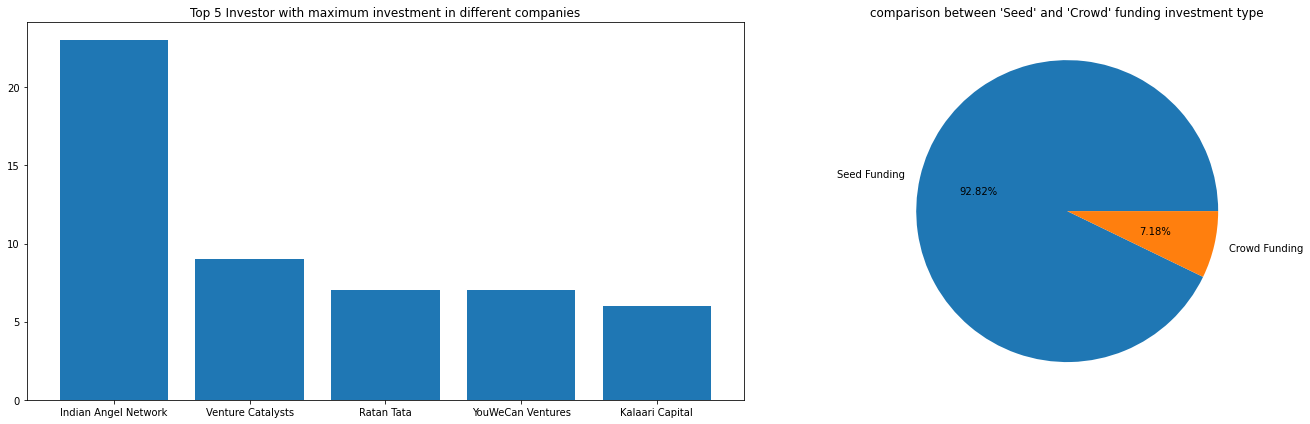

In [85]:
# plot a graph with with two subplot, one is bar graph and another is pie chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.bar(seed_crowd_funding['Investors Name'] , seed_crowd_funding['Startup Name'])
plt.title('Top 5 Investor with maximum investment in different companies')

plt.subplot(1,2,2)
plt.pie(top_investment_type['count'] , labels = top_investment_type['InvestmentnType'] , autopct ='%.2f%%')
plt.title("comparison between 'Seed' and 'Crowd' funding investment type" )

plt.tight_layout()
plt.show()

**Justification :**

From above we can see that - there are  **top 5 investors(['Indian Angel Network' , 'Venture Catalysts' , 'Ratan Tata' , 'YouWeCan Ventures' , 'Kalaari Capital'])**who have invested in a different number of startups **(Here Indian Angel Network is top investor)** and their investment type is **Crowdfunding or Seed Funding**. Even I notice that only in 'Seed Funding' they are invest. Although in 'Crowd funding' investment are come but not from top investors, even 'Crowd funding' get only 7.18% investment where 'Seed Funding' get 92.82% investment. So I suggest my friend that in 'Seed Funding' type investment is best for early stage startup and get investment easily as compare to other.

****************
********************
 **5. Due to your immense help, your friend startup successfully got seed funding and it is in operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a savior to help your friend and want to create a list of probable new investors. Before moving forward you remember your investor friend's advice that finding the investors by analyzing the investment type. Since your friend's startup is not in the early phase it is in a growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistakes. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.**

In [86]:
# create a DataFrame where investors have invested in a different number 
#of startups and their investment type is Private Equity
unique_df_private = investor_df[~(investor_df[['Investors Name','Startup Name','InvestmentnType']].duplicated(subset = ['Investors Name','Startup Name']))]

#filtering out "Seed Funding","Crowd Funding"
unique_df_type_private = unique_df_private[unique_df['InvestmentnType'].isin(["Private Equity"])]
unique_df_type_private

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Day,Month,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,9,1,2020
6,7,2020-01-10,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity,150000000.0,10,1,2020
37,38,2019-09-04,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity,6000000.0,4,9,2019
67,68,2019-07-10,BYJU’S,EdTech,Education,Bangalore,Qatar Investment Authority,Private Equity,150000000.0,10,7,2019
99,100,2019-04-12,Medlife,Ecommerce,Online Medicine,Bangalore,Prasid Uno Family Trust,Private Equity,17000000.0,12,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2863,2864,2015-04-28,Urban Ladder,Ecommerce,Unknown,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,0.0,28,4,2015
2865,2866,2015-04-28,Naaptol.com,Ecommerce,Unknown,Mumbai,Mitsui & Co & existing investors,Private Equity,21500000.0,28,4,2015
2867,2868,2015-04-29,Icertis,Cloud Enterprise Software,Unknown,Pune,"Greycroft Partners, Fidelity Growth Partners",Private Equity,6000000.0,29,4,2015
2868,2869,2015-04-29,Tracxn,Startup Analytics platform,Unknown,Bangalore,SAIF Partners,Private Equity,3500000.0,29,4,2015


In [90]:
# Creat a DataFrame where top5 investors who have invested in a different 
#number of startups and their investment type is private equity
private_equity = unique_df_type_private.groupby(['Investors Name','InvestmentnType'])['Startup Name'].nunique().reset_index().sort_values(by = 'Startup Name',ascending=False).head()
private_equity=private_equity.rename(columns={'Startup Name':'Count'})
private_equity

,Investors Name,InvestmentnType,Count
735,Ratan Tata,Private Equity,16
819,Sequoia Capital,Private Equity,13
758,RoundGlass Partners,Private Equity,9
490,Kalaari Capital,Private Equity,9
26,Accel Partners,Private Equity,9


In [88]:
# top Investment type with investment count
top_investment_type_private = unique_df_type_private['InvestmentnType'].value_counts().reset_index()
top_investment_type_private

,InvestmentnType,count
0,Private Equity,1246


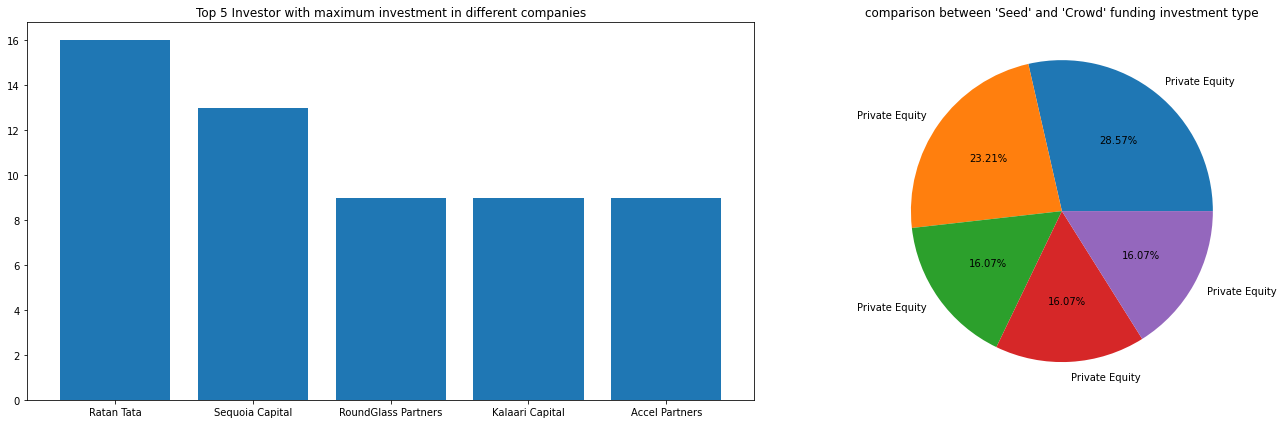

In [92]:
# plot a graph with with two subplot, one is bar graph and another is pie chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.bar(private_equity['Investors Name'] , private_equity['Count'])
plt.title('Top 5 Investor with maximum investment in different companies')

plt.subplot(1,2,2)
plt.pie(private_equity['Count'] , labels = private_equity['InvestmentnType'] , autopct ='%.2f%%')
plt.title("comparison between 'Seed' and 'Crowd' funding investment type" )

plt.tight_layout()
plt.show()

**Justification :**

Here I found the top 5 investors **'Ratan Tata' , 'Sequoia Capital' ,  
'RoundGlass Partners' , 'Kalaari Capital' , 'Accel Partners'** who have invested in a different number of startups and their investment type is Private Equity. since my friend's startup is now in growth stage so the best-suited investment type is Private Equity. So if he contact those top investor for investment for 'Privet Equity',then it's helpfull for his startup's growth.

*******************
***********